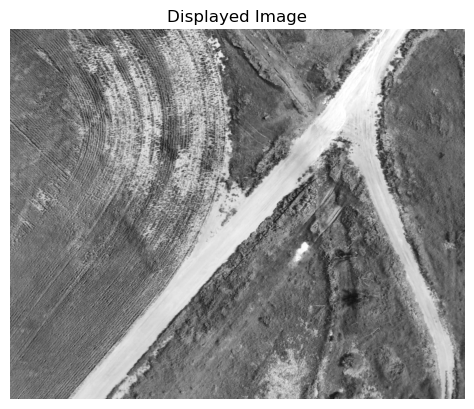

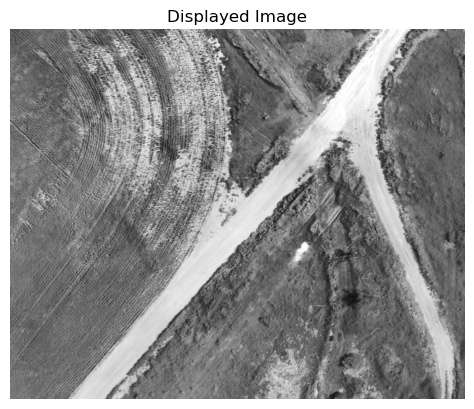

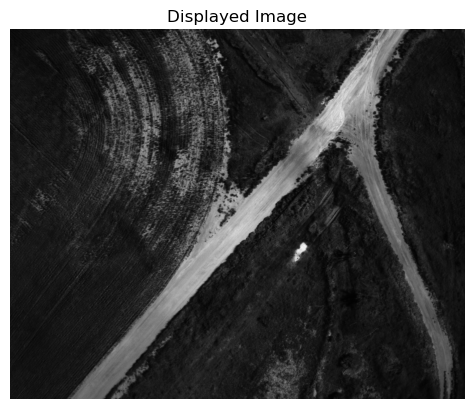

not equal


In [55]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def separate_rgb_channels(image_path):
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        print("Error: Image not found.")
        return None

    # Split the image into its R, G, B channels
    B, G, R = cv2.split(image)
    
    # Optionally display the images
    # cv2.imshow('Red Channel', R)
    # cv2.imshow('Green Channel', G)
    # cv2.imshow('Blue Channel', B)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()
    
    # Optionally save the images
    # cv2.imwrite('Red_Channel.png', R)
    # cv2.imwrite('Green_Channel.png', G)
    # cv2.imwrite('Blue_Channel.png', B)
    
    return R, G, B
def show_image(img):
    # image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.imshow(img, cmap='gray')
    plt.title('Displayed Image')
    plt.axis('off')  # Turn off axis numbers and ticks
    plt.show()
  
# Call the function with a placeholder path (uncomment in practice)
# r_channel, g_channel, b_channel = separate_rgb_channels('path_to_your_image.jpg')
image_path = "./2021 09 06 Kondinin barley E2/DJI_0010.JPG"
R, G, B=separate_rgb_channels(image_path)
show_image(R)  
image_path2="./2021 09 06 Kondinin barley E2/DJI_0013.TIF"
R_gray = cv2.imread(image_path2, cv2.IMREAD_GRAYSCALE)

# # cv2.imshow('Red Channel', R)
# image_rgb = cv2.cvtColor(R, cv2.COLOR_BGR2RGB)
# # 比较两个图片是否一样
# image_path2="./2021 09 06 Kondinin barley E2/DJI_0011.TIF"
# image2 = cv2.imread(image_path2)
show_image(R_gray) 
if np.array_equal(G , R_gray):
     print("equal.")
else: 
    print("not equal")     
# cv2.imshow("label",image2)
#print(image2)  
#print(R)  



In [61]:


def compare_histograms(img1, img2):
    # Load images in grayscale
    
    # Calculate histograms
    hist1 = cv2.calcHist([img1], [0], None, [256], [0, 256])
    hist2 = cv2.calcHist([img2], [0], None, [256], [0, 256])
    
    # Normalize histograms
    hist1 = cv2.normalize(hist1, hist1).flatten()
    hist2 = cv2.normalize(hist2, hist2).flatten()
    
    # Compare histograms
    score = cv2.compareHist(hist1, hist2, cv2.HISTCMP_CORREL)
    return score
image_path2="./2021 09 06 Kondinin barley E2/DJI_0013.TIF"
R_gray = cv2.imread(image_path2, cv2.IMREAD_GRAYSCALE)

compare_histograms(R,R_gray)

-0.2586727606654228

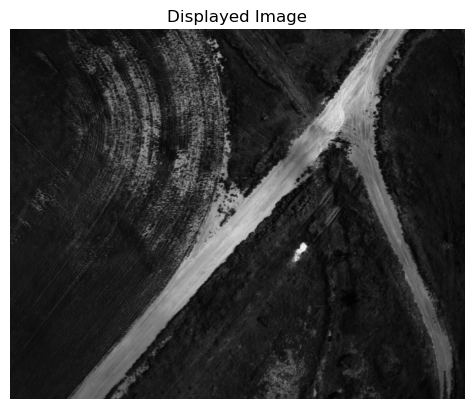

In [62]:


def normalize_grayscale_image(image, scale_min=0, scale_max=1):
    """
    Normalize a grayscale image to a given range [scale_min, scale_max].
    
    Parameters:
        image (numpy.ndarray): The input grayscale image.
        scale_min (float): The minimum value of the output normalized range.
        scale_max (float): The maximum value of the output normalized range.
    
    Returns:
        numpy.ndarray: The normalized grayscale image.
    """
    # Initialize the output image
    normalized_image = np.zeros_like(image, dtype=np.float32)
    
    # Normalize the image
    cv2.normalize(image, normalized_image, alpha=scale_min, beta=scale_max, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    
    return normalized_image

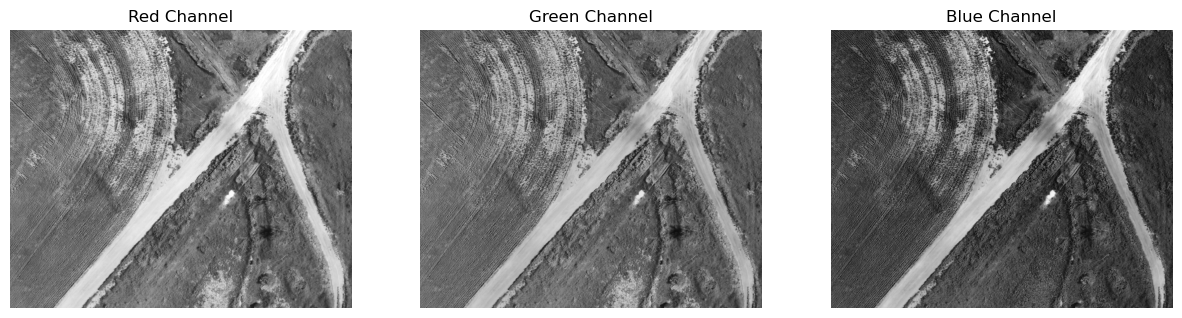

In [22]:
def separate_and_show_rgb_channels(image_path):
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        print("Error: Image not found.")
        return

    # Convert BGR image to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Split the image into its R, G, B channels
    R, G, B = cv2.split(image_rgb)
    
    # Create a figure to display the channels
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    
    # Display the Red Channel
    ax[0].imshow(R, cmap='grey')
    ax[0].set_title('Red Channel')
    ax[0].axis('off')
    
    # Display the Green Channel
    ax[1].imshow(G, cmap='grey')
    ax[1].set_title('Green Channel')
    ax[1].axis('off')
    
    # Display the Blue Channel
    ax[2].imshow(B, cmap='grey')
    ax[2].set_title('Blue Channel')
    ax[2].axis('off')
    
    # Show the plots
    plt.show()

# Example usage (uncomment in practice)
separate_and_show_rgb_channels(image_path)


    

In [4]:
import random
import time

def print_random_miou(start=0.2000, end=0.5200, steps=10, min_interval=0.1, max_interval=1.0):
    current_miou = start
    step_increment = (end - start) / steps

    for _ in range(steps):
        print(f"MIoU: {current_miou:.4f}")
        current_miou += step_increment * random.uniform(0.8, 1.2)
        current_miou = min(current_miou, end)  # 确保不会超过end值
        time.sleep(random.uniform(min_interval, max_interval))

print_random_miou()


MIoU: 0.2000
MIoU: 0.2351
MIoU: 0.2608
MIoU: 0.2900
MIoU: 0.3232
MIoU: 0.3518
MIoU: 0.3859
MIoU: 0.4243
MIoU: 0.4520
MIoU: 0.4837
